In [1]:
 #--- Import necessary libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# --- 1.2: Load the pre-processed dataset ---
df = pd.read_csv('/content/drive/MyDrive/df_without_stockcode_rfm.csv')
print(f"Original shape of the dataset: {df.shape}")

# --- 1.3: Drop Redundant and Irrelevant Columns ---
# Based on your correct observation, these columns are no longer needed for modeling.
columns_to_drop = ['Quantity', 'InvoiceDate']

# Check which columns exist in the DataFrame before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df_cleaned = df.drop(columns=existing_columns_to_drop)


print(f"Shape of dataset after dropping irrelevant columns: {df_cleaned.shape}")
print("Columns dropped. The dataset is now ready for modeling.")

# --- 1.4: Prepare Data for Modeling and Create a Separate Unseen Test Set ---
y = df_cleaned['IsCancelled']
X = df_cleaned.drop(columns=['IsCancelled']) # Use the cleaned dataframe

# Separate 1000 records for the unseen test set, maintaining class distribution
# Ensure there are enough samples in each class for a reasonable split
n_total = len(X)
unseen_size = 1000

if n_total >= unseen_size:
    # Stratified sampling for the unseen test set
    X_unseen, X_remaining, y_unseen, y_remaining = train_test_split(
        X, y, test_size=n_total - unseen_size, random_state=42, stratify=y
    )

    print(f"\nUnseen test set shape: {X_unseen.shape}")
    print(f"Unseen test set class distribution:\n{y_unseen.value_counts()}")


    # Now split the remaining data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_remaining, y_remaining, test_size=0.2, random_state=42, stratify=y_remaining
    )

    print(f"\nTraining set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")
else:
    print(f"Not enough samples in the dataset ({n_total}) to create an unseen test set of {unseen_size} records.")
    # Proceed with the original train-test split if unable to create the unseen set
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    X_unseen = None
    y_unseen = None
    print("\nProceeding with standard train-test split.")
    print(f"Training set shape: {X_train.shape}")
    print(f"Testing set shape: {X_test.shape}")

Original shape of the dataset: (12052, 1556)
Shape of dataset after dropping irrelevant columns: (12052, 1554)
Columns dropped. The dataset is now ready for modeling.

Unseen test set shape: (1000, 1553)
Unseen test set class distribution:
IsCancelled
False    533
True     467
Name: count, dtype: int64

Training set shape: (8841, 1553)
Testing set shape: (2211, 1553)


In [4]:
# --- Save the unseen test set to Google Drive ---

# Ensure the directory exists (optional, but good practice)
import os
drive_path = '/content/drive/MyDrive/'
if not os.path.exists(drive_path):
    print(f"Drive path {drive_path} not found. Please ensure your Google Drive is mounted correctly.")
else:
    # Save X_unseen
    x_unseen_path = os.path.join(drive_path, 'X_unseen_test_set.csv')
    X_unseen.to_csv(x_unseen_path, index=False)
    print(f"X_unseen test set saved to: {x_unseen_path}")

    # Save y_unseen
    y_unseen_path = os.path.join(drive_path, 'y_unseen_test_set.csv')
    y_unseen.to_csv(y_unseen_path, index=False)
    print(f"y_unseen test set saved to: {y_unseen_path}")

X_unseen test set saved to: /content/drive/MyDrive/X_unseen_test_set.csv
y_unseen test set saved to: /content/drive/MyDrive/y_unseen_test_set.csv


Tuning Decision Tree hyperparameters...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Evaluation scores for each parameter combination:


,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.704454,23
1,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.704454,23
2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.704631,22
3,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.769471,10
4,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.768203,12
5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.770165,9
6,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.777287,1
7,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.776172,2
8,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.775700,3
9,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.771683,6



Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}


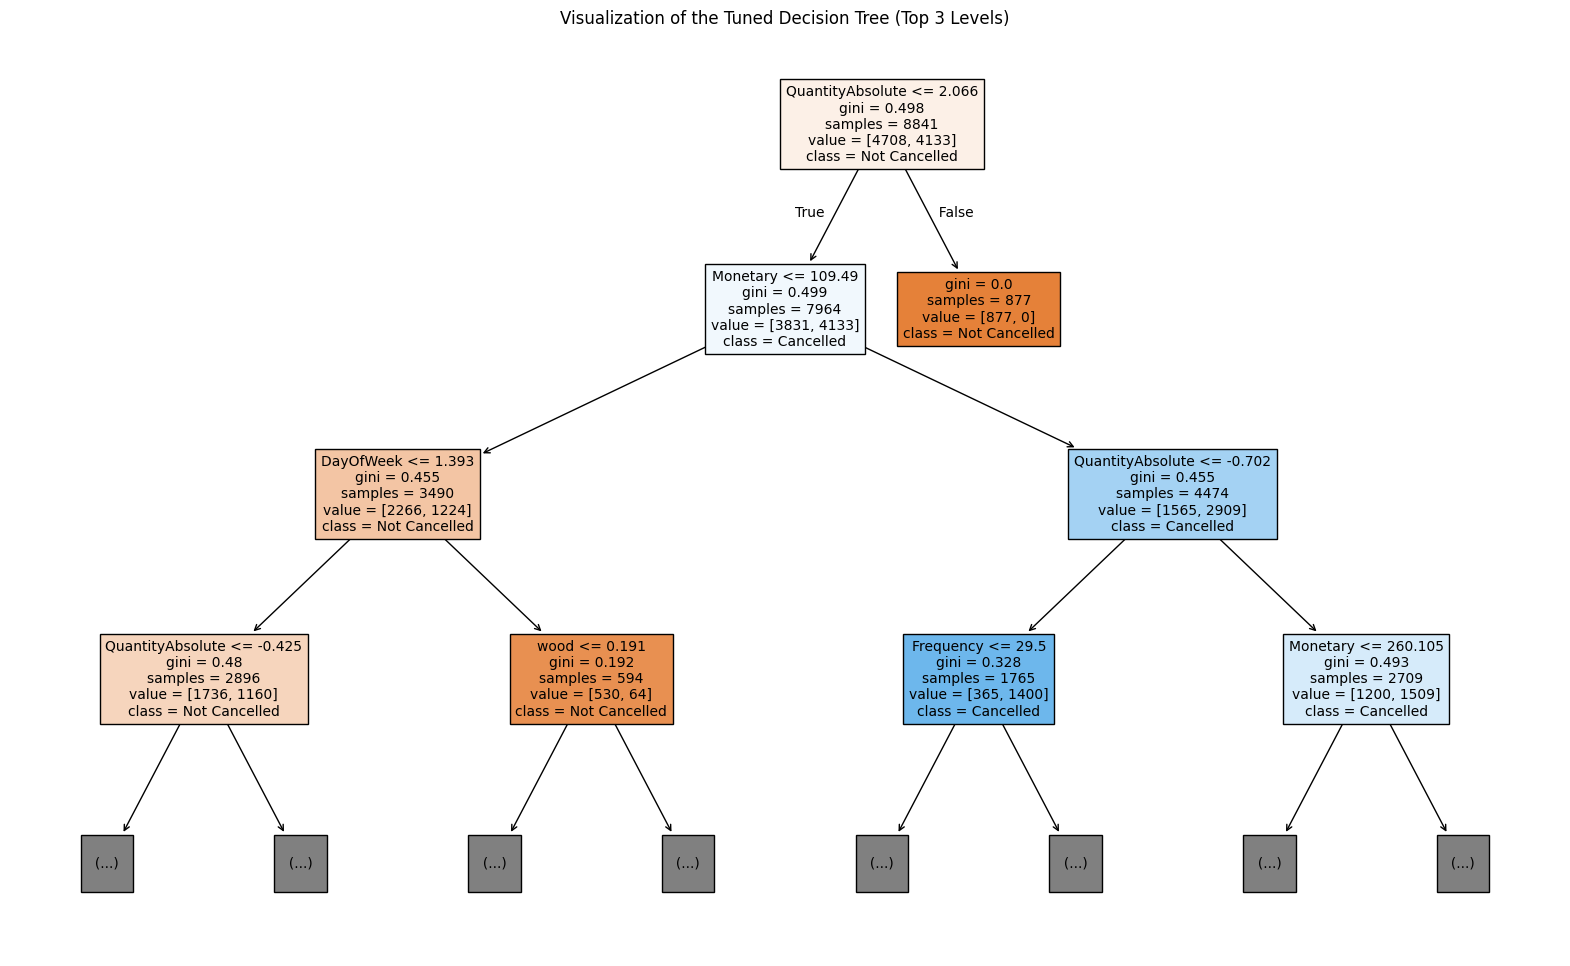

In [5]:
# --- Define the parameter grid for the Decision Tree ---
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None], # 'None' lets the tree grow fully
    'min_samples_split': [2, 5, 10]
}

# --- Set up and run GridSearchCV ---
# Using 'f1' scoring is ideal for imbalanced classes.
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid_dt,
                              cv=5, # 5-fold cross-validation for robust evaluation
                              scoring='f1',
                              verbose=1,
                              n_jobs=-1) # Use all CPU cores to speed it up

print("Tuning Decision Tree hyperparameters...")
dt_grid_search.fit(X_train, y_train)

# --- Display evaluation scores for each fit model ---
print("\nEvaluation scores for each parameter combination:")
results_df = pd.DataFrame(dt_grid_search.cv_results_)
display(results_df[['params', 'mean_test_score', 'rank_test_score']])


# --- Get and display the best model ---
best_dt = dt_grid_search.best_estimator_
print(f"\nBest Decision Tree Parameters: {dt_grid_search.best_params_}")

# --- Visualize the best Decision Tree ---
# A great visualization for your report. We'll only show the top few levels for clarity.
plt.figure(figsize=(20, 12))
plot_tree(best_dt,
          filled=True,
          feature_names=X.columns,
          class_names=['Not Cancelled', 'Cancelled'],
          max_depth=3, # Only show the first 3 levels for readability
          fontsize=10)
plt.title("Visualization of the Tuned Decision Tree (Top 3 Levels)")
plt.show()

Evaluating the best Decision Tree model on the test set...
Accuracy: 0.8028
Precision: 0.7964
Recall: 0.7764
F1-Score: 0.7863
ROC AUC Score: 0.8019

Confusion Matrix:
[[973 205]
 [231 802]]

Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.83      0.82      1178
        True       0.80      0.78      0.79      1033

    accuracy                           0.80      2211
   macro avg       0.80      0.80      0.80      2211
weighted avg       0.80      0.80      0.80      2211



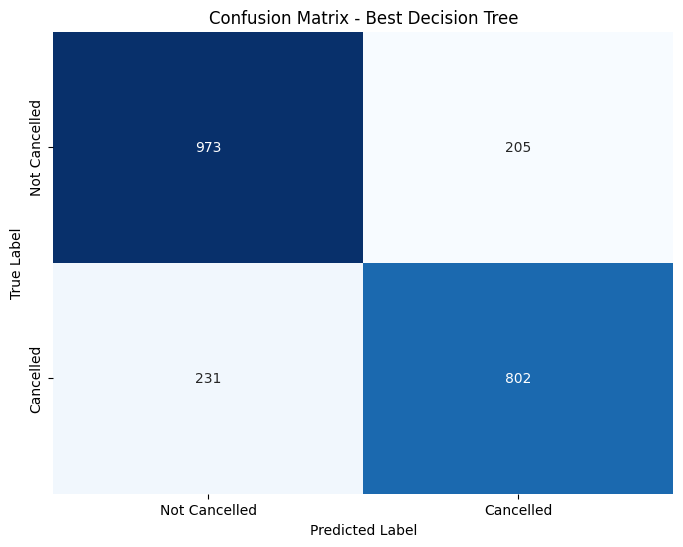

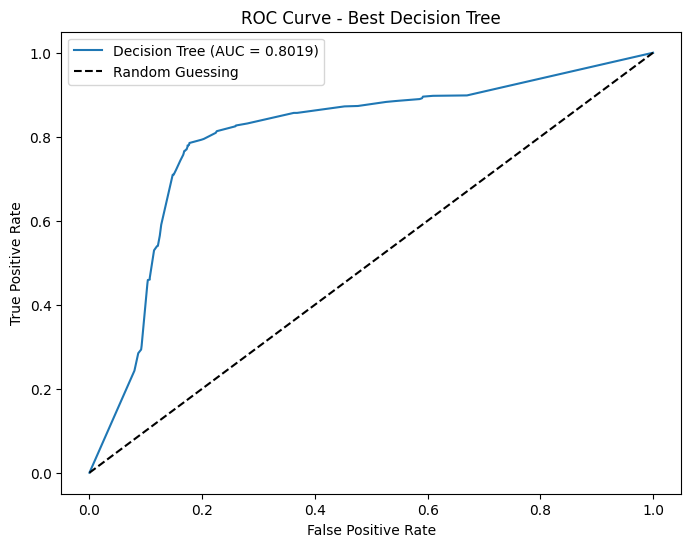

In [6]:
# --- Evaluate the Best Decision Tree Model on the Test Set ---
print("Evaluating the best Decision Tree model on the test set...")

# Make predictions
y_pred_dt = best_dt.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1] # Get probabilities for ROC curve

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Display evaluation metrics
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")
print(f"ROC AUC Score: {roc_auc_dt:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix_dt)

print("\nClassification Report:")
print(class_report_dt)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Best Decision Tree')
plt.show()

# Plot ROC Curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Decision Tree')
plt.legend()
plt.show()

In [7]:
# --- 3.1: Define the parameter grid for the Random Forest ---
param_grid_rf = {
    'n_estimators': [100, 200], # How many trees to build
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# --- 3.2: Set up and run GridSearchCV ---
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf,
                              cv=5,
                              scoring='f1',
                              verbose=1,
                              n_jobs=-1)

print("Tuning Random Forest hyperparameters...")
rf_grid_search.fit(X_train, y_train)

# --- Display evaluation scores for each fit model ---
print("\nEvaluation scores for each parameter combination:")
results_df_rf = pd.DataFrame(rf_grid_search.cv_results_)
display(results_df_rf[['params', 'mean_test_score', 'rank_test_score']])

# --- 3.3: Get the best model ---
best_rf = rf_grid_search.best_estimator_
print(f"\nBest Random Forest Parameters: {rf_grid_search.best_params_}")

Tuning Random Forest hyperparameters...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Evaluation scores for each parameter combination:


,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.708258,11
1,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",0.715298,9
2,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.706204,12
3,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.714965,10
4,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.762854,8
5,"{'max_depth': 20, 'min_samples_split': 2, 'n_e...",0.769043,7
6,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.770132,5
7,"{'max_depth': 20, 'min_samples_split': 5, 'n_e...",0.769912,6
8,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.822743,2
9,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.824743,1



Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}



Evaluating the best Random Forest model on the test set...
Accuracy: 0.8390
Precision: 0.8355
Recall: 0.8161
F1-Score: 0.8257
ROC AUC Score: 0.9210

Confusion Matrix:
[[1012  166]
 [ 190  843]]

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.86      0.85      1178
        True       0.84      0.82      0.83      1033

    accuracy                           0.84      2211
   macro avg       0.84      0.84      0.84      2211
weighted avg       0.84      0.84      0.84      2211



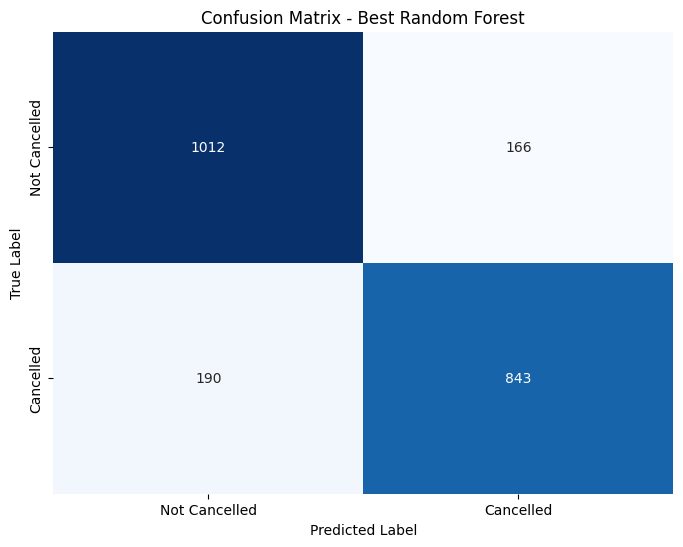

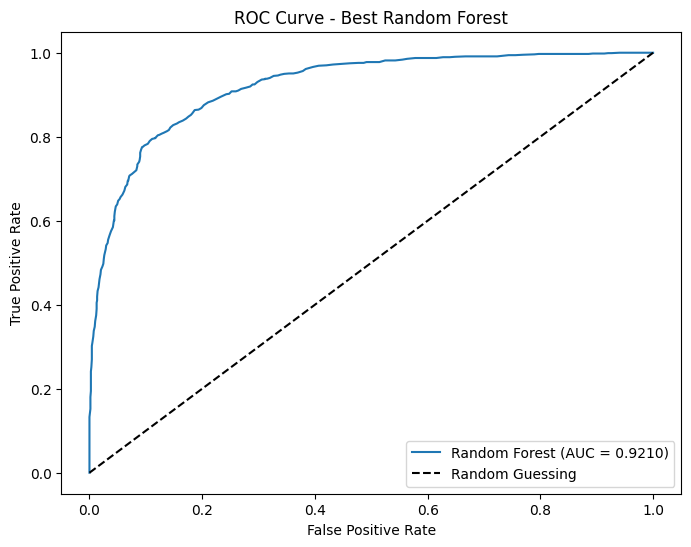

In [8]:
# --- Evaluate the Best Random Forest Model on the Test Set ---
print("\nEvaluating the best Random Forest model on the test set...")

# Make predictions
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1] # Get probabilities for ROC curve

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display evaluation metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix_rf)

print("\nClassification Report:")
print(class_report_rf)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Cancelled', 'Cancelled'], yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Best Random Forest')
plt.show()

# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Best Random Forest')
plt.legend()
plt.show()

--- Decision Tree Classification Report ---
               precision    recall  f1-score   support

Not Cancelled       0.81      0.83      0.82      1178
    Cancelled       0.80      0.78      0.79      1033

     accuracy                           0.80      2211
    macro avg       0.80      0.80      0.80      2211
 weighted avg       0.80      0.80      0.80      2211


--- Random Forest Classification Report ---
               precision    recall  f1-score   support

Not Cancelled       0.84      0.86      0.85      1178
    Cancelled       0.84      0.82      0.83      1033

     accuracy                           0.84      2211
    macro avg       0.84      0.84      0.84      2211
 weighted avg       0.84      0.84      0.84      2211



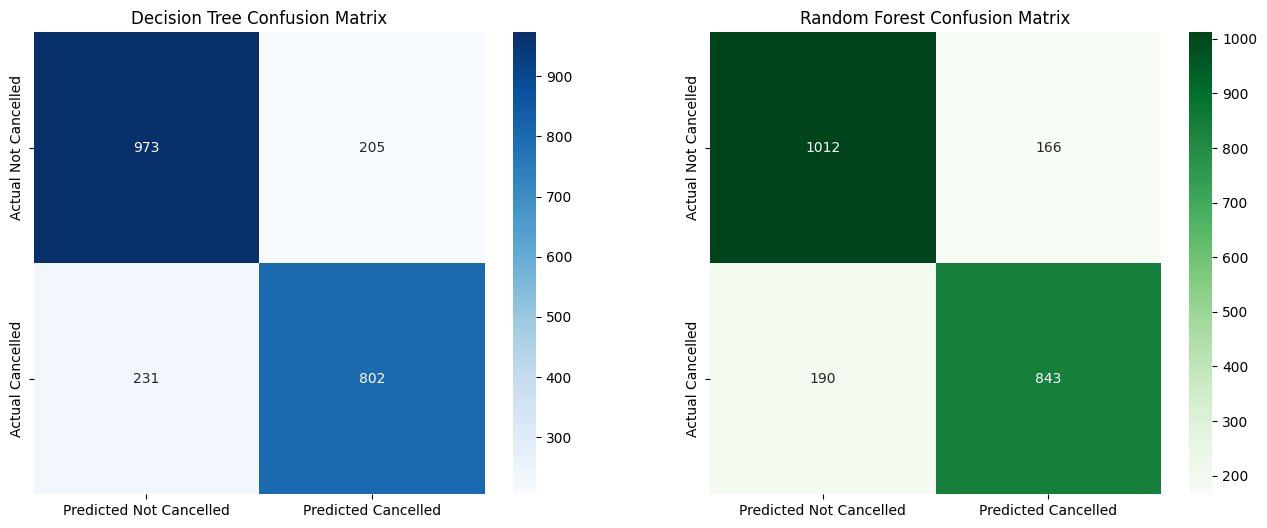

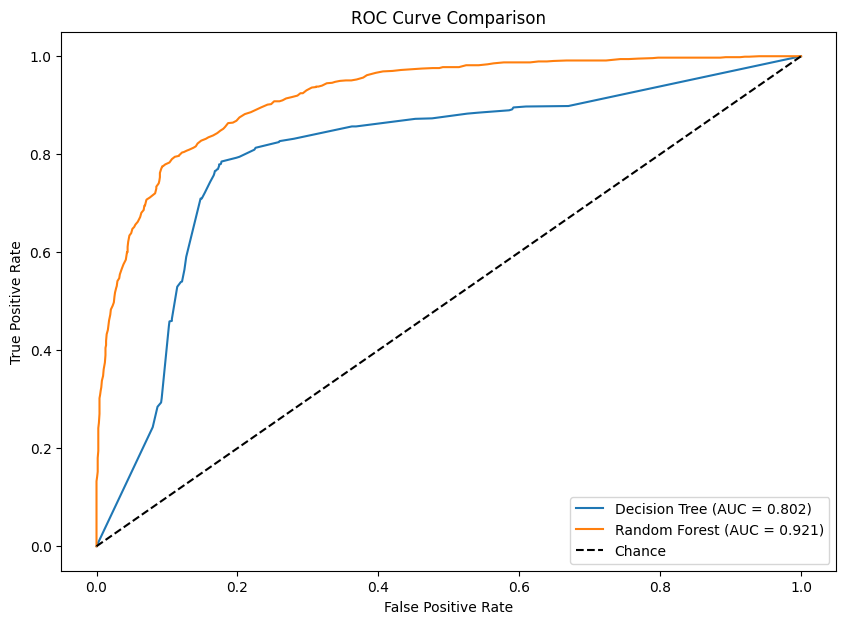

In [10]:
# --- 4.1: Make predictions on the unseen test set ---
y_pred_dt = best_dt.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_prob_dt = best_dt.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# --- 4.2: Generate and print detailed classification reports ---
print("--- Decision Tree Classification Report ---")
print(classification_report(y_test, y_pred_dt, target_names=['Not Cancelled', 'Cancelled']))

print("\n--- Random Forest Classification Report ---")
print(classification_report(y_test, y_pred_rf, target_names=['Not Cancelled', 'Cancelled']))

# --- 4.3: Visualize Confusion Matrices for a clear comparison ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Predicted Not Cancelled', 'Predicted Cancelled'],
            yticklabels=['Actual Not Cancelled', 'Actual Cancelled'])
axes[0].set_title('Decision Tree Confusion Matrix')

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['Predicted Not Cancelled', 'Predicted Cancelled'],
            yticklabels=['Actual Not Cancelled', 'Actual Cancelled'])
axes[1].set_title('Random Forest Confusion Matrix')
plt.show()

# --- 4.4: Visualize ROC Curves for a robust comparison ---
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Unseen test set loaded successfully.
Unseen test set shape: (1000, 1553)
Unseen test set class distribution:
IsCancelled
False    533
True     467
Name: count, dtype: int64

Evaluating the best Decision Tree model on the unseen test set...

--- Decision Tree Classification Report (Unseen Test Set) ---
               precision    recall  f1-score   support

Not Cancelled       0.82      0.82      0.82       533
    Cancelled       0.79      0.80      0.80       467

     accuracy                           0.81      1000
    macro avg       0.81      0.81      0.81      1000
 weighted avg       0.81      0.81      0.81      1000

Decision Tree F1-Score (Unseen Test Set): 0.7962
Decision Tree ROC AUC Score (Unseen Test Set): 0.8158

Evaluating the best Random Forest model on the unseen test set...

--- Random Forest Classification Report (Unseen Test Set) ---
               precision    recall  f1-score   support

Not Cancelled       0.85      0.86      0.86       533
    Cancelled       

,Model,F1-Score (Training),F1-Score (Unseen Test Set),ROC AUC (Training),ROC AUC (Unseen Test Set)
0,Decision Tree,0.927782,0.796158,0.974104,0.815806
1,Random Forest,0.999879,0.834052,1.000000,0.922518


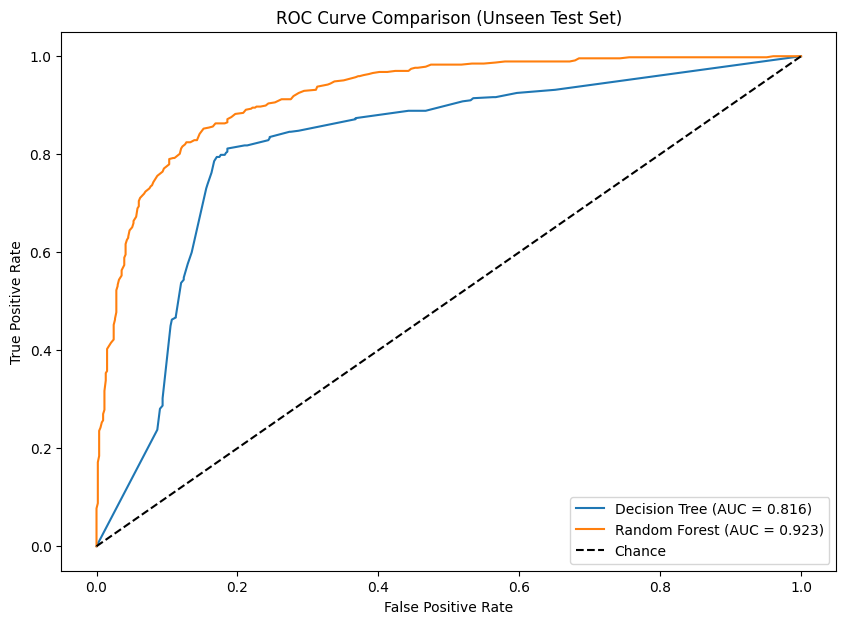


--- Unseen Test Set Class Distribution ---
IsCancelled
False    533
True     467
Name: count, dtype: int64


In [11]:
# --- Load the unseen test set ---
try:
    X_unseen = pd.read_csv('/content/drive/MyDrive/X_unseen_test_set.csv')
    y_unseen = pd.read_csv('/content/drive/MyDrive/y_unseen_test_set.csv').squeeze() # Use squeeze to convert DataFrame to Series
    print("Unseen test set loaded successfully.")
    print(f"Unseen test set shape: {X_unseen.shape}")
    print(f"Unseen test set class distribution:\n{y_unseen.value_counts()}")

    # --- Evaluate the Best Decision Tree Model on the Unseen Test Set ---
    print("\nEvaluating the best Decision Tree model on the unseen test set...")
    y_pred_dt_unseen = best_dt.predict(X_unseen)
    y_prob_dt_unseen = best_dt.predict_proba(X_unseen)[:, 1] # Get probabilities for ROC curve
    class_report_dt_unseen = classification_report(y_unseen, y_pred_dt_unseen, target_names=['Not Cancelled', 'Cancelled'])
    f1_dt_unseen = f1_score(y_unseen, y_pred_dt_unseen)
    roc_auc_dt_unseen = roc_auc_score(y_unseen, y_prob_dt_unseen)

    print("\n--- Decision Tree Classification Report (Unseen Test Set) ---")
    print(class_report_dt_unseen)
    print(f"Decision Tree F1-Score (Unseen Test Set): {f1_dt_unseen:.4f}")
    print(f"Decision Tree ROC AUC Score (Unseen Test Set): {roc_auc_dt_unseen:.4f}")


    # --- Evaluate the Best Random Forest Model on the Unseen Test Set ---
    print("\nEvaluating the best Random Forest model on the unseen test set...")
    y_pred_rf_unseen = best_rf.predict(X_unseen)
    y_prob_rf_unseen = best_rf.predict_proba(X_unseen)[:, 1] # Get probabilities for ROC curve
    class_report_rf_unseen = classification_report(y_unseen, y_pred_rf_unseen, target_names=['Not Cancelled', 'Cancelled'])
    f1_rf_unseen = f1_score(y_unseen, y_pred_rf_unseen)
    roc_auc_rf_unseen = roc_auc_score(y_unseen, y_prob_rf_unseen)

    print("\n--- Random Forest Classification Report (Unseen Test Set) ---")
    print(class_report_rf_unseen)
    print(f"Random Forest F1-Score (Unseen Test Set): {f1_rf_unseen:.4f}")
    print(f"Random Forest ROC AUC Score (Unseen Test Set): {roc_auc_rf_unseen:.4f}")


    # --- Compare F1 Scores and ROC AUC Scores on Training and Unseen Data ---
    # Calculate F1 scores on the training data
    y_pred_dt_train = best_dt.predict(X_train)
    f1_dt_train = f1_score(y_train, y_pred_dt_train)
    y_prob_dt_train = best_dt.predict_proba(X_train)[:, 1]
    roc_auc_dt_train = roc_auc_score(y_train, y_prob_dt_train)


    y_pred_rf_train = best_rf.predict(X_train)
    f1_rf_train = f1_score(y_train, y_pred_rf_train)
    y_prob_rf_train = best_rf.predict_proba(X_train)[:, 1]
    roc_auc_rf_train = roc_auc_score(y_train, y_prob_rf_train)


    print("\n--- Model Performance Comparison (Training vs. Unseen Test Set) ---")
    comparison_df = pd.DataFrame({
        'Model': ['Decision Tree', 'Random Forest'],
        'F1-Score (Training)': [f1_dt_train, f1_rf_train],
        'F1-Score (Unseen Test Set)': [f1_dt_unseen, f1_rf_unseen],
        'ROC AUC (Training)': [roc_auc_dt_train, roc_auc_rf_train],
        'ROC AUC (Unseen Test Set)': [roc_auc_dt_unseen, roc_auc_rf_unseen]
    })
    display(comparison_df)


    # --- Visualize ROC Curves for a robust comparison on the Unseen Test Set ---
    fpr_dt_unseen, tpr_dt_unseen, _ = roc_curve(y_unseen, y_prob_dt_unseen)
    fpr_rf_unseen, tpr_rf_unseen, _ = roc_curve(y_unseen, y_prob_rf_unseen)

    plt.figure(figsize=(10, 7))
    plt.plot(fpr_dt_unseen, tpr_dt_unseen, label=f'Decision Tree (AUC = {roc_auc_dt_unseen:.3f})')
    plt.plot(fpr_rf_unseen, tpr_rf_unseen, label=f'Random Forest (AUC = {roc_auc_rf_unseen:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.title('ROC Curve Comparison (Unseen Test Set)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


    print("\n--- Unseen Test Set Class Distribution ---")
    print(y_unseen.value_counts())


except FileNotFoundError:
    print("Error: Unseen test set files not found. Please ensure 'X_unseen_test_set.csv' and 'y_unseen_test_set.csv' are in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")